<a href="https://colab.research.google.com/github/wilcastano/wilcastano/blob/main/Modulo2_Inidad1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Actividad Unidad 3

Grupo 8:

Antonio Giacometto
Antonio Fajardo
Wilmer Castaño

Dataset:hyroid-disease 
https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/allhypo.data

by the Garavan Institute and J. Ross  Quinlan, New South Wales Institute, Syndney, Australia.
 1987.


In [ ]:
# Carga de librerías y lectura del archivo que contiene los datos

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

url="https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/allhypo.data"
data = pd.read_csv(url, header=None, na_values="?")
#data = pd.read_csv(url, header=None, keep_default_na=True)

# Se etiquetan las columnas para poder interpretar más fácilmente los datos.
# Cada fila es un ejemplo, cada columna un atributo.
# La columna llamada C es el atributo a predecir
data.columns = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant',
              'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 
              'hypopituitary','psych','TSH_measured','TSH','T3_measured','T3','TT4_measured','TT4','T4U_measured','T4U',
              'FTI_measured','FTI','TBG_measured','TBG','referral_source','Class']

#Se ajusta la clase eliminado descripcion
data['Class']= data['Class'].str.split('.', expand=True)[0]


#Se convierte tipos de dato object a Float
data['age'] =  pd.to_numeric(data.age, errors="coerce")
data['TSH'] = data['TSH'].astype(float)
data['T3'] = data['T3'].astype(float)
data['TT4'] = data['TT4'].astype(float)
data['T4U'] = data['T4U'].astype(float)
data['FTI'] = data['FTI'].astype(float)
data['TBG'] = data['TBG'].astype(float)

data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative


In [ ]:
#Cuál es el número de registros?
#Cuál es el número de atributos?

shape = data.shape
shape

(2800, 30)

In [ ]:
#Cual es el tipo de los atributos?
data.dtypes

age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
sick                          object
pregnant                      object
thyroid_surgery               object
I131_treatment                object
query_hypothyroid             object
query_hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
T

In [ ]:
#Medida de centralidad y desviación para atributos numéricos:
data.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,2799.00000,2516.000000,2215.000000,2616.000000,2503.000000,2505.000000,0.0
mean,51.84423,4.672150,2.024966,109.072401,0.997912,110.787984,NaN
std,20.46116,21.449453,0.824600,35.392443,0.194390,32.883986,NaN
min,1.00000,0.005000,0.050000,2.000000,0.310000,2.000000,NaN
25%,36.00000,0.440000,1.600000,88.000000,0.880000,93.000000,NaN
50%,54.00000,1.400000,2.000000,104.000000,0.980000,107.000000,NaN
75%,67.00000,2.600000,2.400000,125.000000,1.080000,124.000000,NaN
max,455.00000,478.000000,10.600000,430.000000,2.120000,395.000000,NaN


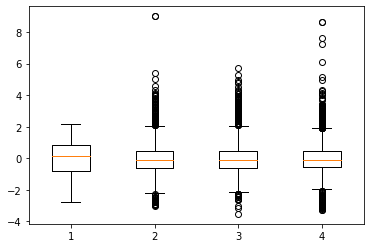

In [ ]:
# Diagrama de cajas y bigotes para atributos numéricos
# Permite identificar la existencia de datos atípicos

plt.boxplot((data['age'],data['TT4'],data['T4U'],data['FTI']))
plt.show()


In [ ]:
#Medida de centralidad para atributos categóricos:
data.mode()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,59.0,F,f,f,f,f,f,f,f,f,...,t,101.0,t,0.99,t,100.0,f,NaN,other,negative
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,107.0,NaN,NaN,NaN,NaN


In [ ]:
# Correlación entre los atributos de entrada numéricos
# Permite detectar si hay atributos redundantes (correlación mayor a 0.85 o menor a -0.85)
data.corr()

,age,TSH,T3,TT4,T4U,FTI,TBG
age,1.000000,-0.059776,-0.244702,-0.052111,-0.163357,0.037623,NaN
TSH,-0.059776,1.000000,-0.160890,-0.254791,0.067705,-0.291188,NaN
T3,-0.244702,-0.160890,1.000000,0.563901,0.463434,0.351013,NaN
TT4,-0.052111,-0.254791,0.563901,1.000000,0.434248,0.795206,NaN
T4U,-0.163357,0.067705,0.463434,0.434248,1.000000,-0.173056,NaN
FTI,0.037623,-0.291188,0.351013,0.795206,-0.173056,1.000000,NaN
TBG,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Cual es el máximo de datos faltantes en un mismo registro?
# Si hay registros a los que les faltan muchos valores, es mejor eliminarlos.
max(data.isnull().sum(axis=1))

7

In [ ]:
#Cuantos datos faltantes hay por cada atributo?
data.isnull().sum()

age                             1
sex                           110
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           284
T3_measured                     0
T3                            585
TT4_measured                    0
TT4                           184
T4U_measured                    0
T4U                           297
FTI_measured                    0
FTI                           295
TBG_measured                    0
TBG                          2800
referral_source                 0
Class         

 Eliminamos las columnas TBG y 'TBG_Measured' ya que no presentan información en el df, 
debido a que tiene el mismo valor (f) en todos los registros.
 Es decir, a ninguno de los pacientes se les realizo esta prueba
 por lo tanto no entregará información valiosa para entrenar nuestro modelo de clasificación.

Se deciden eliminar T3 y T3 measured, puesto que es la segunda variable con mas faltantes (no presenta informacion para el 20% de los registros). Por otro lado, se investigó que la medicion de niveles de T3 no es recomendado para el diagnostico de hipotiroidismo (ver links debajo)
  
 https://www.medicalnewstoday.com/articles/t3-levels

 https://www.msdmanuals.com/professional/endocrine-and-metabolic-disorders/thyroid-disorders/hypothyroidism

In [ ]:
# Eliminacion de columnas
data.drop(columns = ['TBG_measured','TBG','T3','T3_measured'], inplace = True)

data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH_measured,TSH,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,1.30,t,125.0,t,1.14,t,109.0,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,4.10,t,102.0,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,0.98,t,109.0,t,0.91,t,120.0,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,0.16,t,175.0,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,0.72,t,61.0,t,0.87,t,70.0,SVI,negative


In [ ]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?

print(data['Class'].value_counts())

negative                   2580
compensated hypothyroid     154
primary hypothyroid          64
secondary hypothyroid         2
Name: Class, dtype: int64


El bajo número de registros en el dataset correspondientes a las clases "secondary hypothyroid" y al alto nivel de desbalanceo entre las diferentes clases nos hacen pensar en que sería necesario una recategorización del atributo respuesta en una binaria (Negativa, Positiva para Hipotiroide). Por tal motivo, durante la etapa de modelación se presentarán los dos escenarios

## Etapa 2: Preparación de los datos
De acuerdo a lo observado en la etapa 1, se define una secuencia de actividades que modifican los datos para eliminar las situaciones que puedan ser causa de fallo o deficiencia en el proceso de aprendizaje. En este caso se van a realizar las siguientes actividades:


1.   Completar los datos faltantes utilizando la media para atributos numéricos y la moda para atributos categóricos.
2.   Convertir los atributos categóricos a escala numérica.
3.   Normalizar los valores de algunos los atributos.
4.   Balancear las clases eliminando registros de la clase mayoritaria.






In [ ]:
# Se reemplazan los datos faltantes (NaN) por la moda de cada atributo.
data["age"].fillna(59, inplace = True)
data['sex'].fillna('F', inplace = True)

#se eliminan valores extremos
# 1) se elimina la edad de 455 años
data = data[data['age'] != 455]

In [ ]:
data.describe()

,age,TSH,TT4,T4U,FTI
count,2799.000000,2515.000000,2615.000000,2502.000000,2504.000000
mean,51.702751,4.673571,109.068987,0.997859,110.790695
std,18.988623,21.453600,35.398781,0.194411,32.890274
min,1.000000,0.005000,2.000000,0.310000,2.000000
25%,36.000000,0.440000,88.000000,0.880000,93.000000
50%,54.000000,1.400000,104.000000,0.980000,107.000000
75%,67.000000,2.600000,125.000000,1.080000,124.000000
max,94.000000,478.000000,430.000000,2.120000,395.000000


Se decidió eliminar los registros con datos faltantes de las siguientes columnas: 


1.   "TSH"
2.   "T4U"
3.   "FTI"
4. "TT4"


Puesto que estas columnas cuando no tienen valor indican que la prueba no se realizó. Consideramos que no era correcto imputar los datos faltantes con un 0, puesto que este valor afectaria el resultado de la prueba de los que si habian tomado la prueba y tenian un valor asignado.
si se imputaba con la moda, tambien se presentaria una situacion semejante.


In [ ]:
# SE eliminan los registros con datos faltantes

data = data[data['TSH'].notna()]
data = data[data['T4U'].notna()]
data = data[data['FTI'].notna()]
data = data[data['TT4'].notna()]

In [ ]:
data.shape

(2383, 26)

In [ ]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?

print(data['Class'].value_counts())

negative                   2183
compensated hypothyroid     141
primary hypothyroid          58
secondary hypothyroid         1
Name: Class, dtype: int64


In [ ]:
# Recategorización de atributo 'Class'
data_bin = data.copy()
data_bin['Class'] = np.where( (data_bin['Class'] =="compensated hypothyroid") | (data_bin['Class'] =="primary hypothyroid") | (data_bin['Class'] =="secondary hypothyroid") , 1, 0)
data_bin.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH_measured,TSH,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,1.30,t,125.0,t,1.14,t,109.0,SVHC,0
2,46.0,M,f,f,f,f,f,f,f,f,...,t,0.98,t,109.0,t,0.91,t,120.0,other,0
4,70.0,F,f,f,f,f,f,f,f,f,...,t,0.72,t,61.0,t,0.87,t,70.0,SVI,0
5,18.0,F,t,f,f,f,f,f,f,f,...,t,0.03,t,183.0,t,1.30,t,141.0,other,0
7,80.0,F,f,f,f,f,f,f,f,f,...,t,2.20,t,80.0,t,0.70,t,115.0,SVI,0


In [ ]:
from sklearn.preprocessing import LabelEncoder 

# Se convierten los atributos categóricos a valores numéricos
labelencoder= LabelEncoder() 
data_bin['sex'] = labelencoder.fit_transform(data_bin['sex'])
data_bin['on_thyroxine'] = labelencoder.fit_transform(data_bin['on_thyroxine'])
data_bin['query_on_thyroxine'] = labelencoder.fit_transform(data_bin['query_on_thyroxine'])
data_bin['on_antithyroid_medication'] = labelencoder.fit_transform(data_bin['on_antithyroid_medication'])
data_bin['sick'] = labelencoder.fit_transform(data_bin['sick'])
data_bin['pregnant'] = labelencoder.fit_transform(data_bin['pregnant'])
data_bin['thyroid_surgery'] = labelencoder.fit_transform(data_bin['thyroid_surgery'])
data_bin['I131_treatment'] = labelencoder.fit_transform(data_bin['I131_treatment'])
data_bin['query_hypothyroid'] = labelencoder.fit_transform(data_bin['query_hypothyroid'])
data_bin['query_hyperthyroid'] = labelencoder.fit_transform(data_bin['query_hyperthyroid'])
data_bin['lithium'] = labelencoder.fit_transform(data_bin['lithium'])
data_bin['goitre'] = labelencoder.fit_transform(data_bin['goitre'])
data_bin['tumor'] = labelencoder.fit_transform(data_bin['tumor'])
data_bin['hypopituitary'] = labelencoder.fit_transform(data_bin['hypopituitary'])
data_bin['psych'] = labelencoder.fit_transform(data_bin['psych'])
data_bin['TSH_measured'] = labelencoder.fit_transform(data_bin['TSH_measured'])
data_bin['TT4_measured'] = labelencoder.fit_transform(data_bin['TT4_measured'])
data_bin['T4U_measured'] = labelencoder.fit_transform(data_bin['T4U_measured'])
data_bin['FTI_measured'] = labelencoder.fit_transform(data_bin['FTI_measured'])
data_bin['referral_source'] = labelencoder.fit_transform(data_bin['referral_source'])
data_bin['Class'] = labelencoder.fit_transform(data_bin['Class'])
data_bin.head()

# Se convierten los atributos categóricos a valores numéricos
labelencoder= LabelEncoder() 
data['sex'] = labelencoder.fit_transform(data['sex'])
data['on_thyroxine'] = labelencoder.fit_transform(data['on_thyroxine'])
data['query_on_thyroxine'] = labelencoder.fit_transform(data['query_on_thyroxine'])
data['on_antithyroid_medication'] = labelencoder.fit_transform(data['on_antithyroid_medication'])
data['sick'] = labelencoder.fit_transform(data['sick'])
data['pregnant'] = labelencoder.fit_transform(data['pregnant'])
data['thyroid_surgery'] = labelencoder.fit_transform(data['thyroid_surgery'])
data['I131_treatment'] = labelencoder.fit_transform(data['I131_treatment'])
data['query_hypothyroid'] = labelencoder.fit_transform(data['query_hypothyroid'])
data['query_hyperthyroid'] = labelencoder.fit_transform(data['query_hyperthyroid'])
data['lithium'] = labelencoder.fit_transform(data['lithium'])
data['goitre'] = labelencoder.fit_transform(data['goitre'])
data['tumor'] = labelencoder.fit_transform(data['tumor'])
data['hypopituitary'] = labelencoder.fit_transform(data['hypopituitary'])
data['psych'] = labelencoder.fit_transform(data['psych'])
data['TSH_measured'] = labelencoder.fit_transform(data['TSH_measured'])
data['TT4_measured'] = labelencoder.fit_transform(data['TT4_measured'])
data['T4U_measured'] = labelencoder.fit_transform(data['T4U_measured'])
data['FTI_measured'] = labelencoder.fit_transform(data['FTI_measured'])
data['referral_source'] = labelencoder.fit_transform(data['referral_source'])
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH_measured,TSH,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,Class
0,41.0,0,0,0,0,0,0,0,0,0,...,0,1.30,0,125.0,0,1.14,0,109.0,1,negative
2,46.0,1,0,0,0,0,0,0,0,0,...,0,0.98,0,109.0,0,0.91,0,120.0,4,negative
4,70.0,0,0,0,0,0,0,0,0,0,...,0,0.72,0,61.0,0,0.87,0,70.0,3,negative
5,18.0,0,1,0,0,0,0,0,0,0,...,0,0.03,0,183.0,0,1.30,0,141.0,4,negative
7,80.0,0,0,0,0,0,0,0,0,0,...,0,2.20,0,80.0,0,0.70,0,115.0,3,negative


In [ ]:
from sklearn import preprocessing

# Se normalizan todos los atributos seleccionados (columnas numericas)
data_bin['age'] = preprocessing.scale(data_bin['age'])
data_bin['TSH'] = preprocessing.scale(data_bin['TSH'])
data_bin['TT4'] = preprocessing.scale(data_bin['TT4'])
data_bin['T4U'] = preprocessing.scale(data_bin['T4U'])
data_bin['FTI'] = preprocessing.scale(data_bin['FTI'])

data_bin.head()

# Se normalizan todos los atributos seleccionados (columnas numericas)
data['age'] = preprocessing.scale(data['age'])
data['TSH'] = preprocessing.scale(data['TSH'])
data['TT4'] = preprocessing.scale(data['TT4'])
data['T4U'] = preprocessing.scale(data['T4U'])
data['FTI'] = preprocessing.scale(data['FTI'])

data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH_measured,TSH,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,Class
0,-0.619709,0,0,0,0,0,0,0,0,0,...,0,-0.152661,0,0.434637,0,0.723404,0,-0.054248,1,negative
2,-0.353376,1,0,0,0,0,0,0,0,0,...,0,-0.167326,0,-0.014727,0,-0.454013,0,0.279641,4,negative
4,0.925027,0,0,0,0,0,0,0,0,0,...,0,-0.179242,0,-1.362820,0,-0.658781,0,-1.238037,3,negative
5,-1.844845,0,1,0,0,0,0,0,0,0,...,0,-0.210864,0,2.063582,0,1.542476,0,0.917066,4,negative
7,1.457694,0,0,0,0,0,0,0,0,0,...,0,-0.111415,0,-0.829200,0,-1.529046,0,0.127874,3,negative


## Etapa 3: Modelado
En esta etapa se van a utilizar los datos para realizar aprendizaje del atributo C a partir de los valores de los demás atributos. Es decir, se va a predecir si una persona tiene ingresos superiores o inferiores a 50K dolares. Las actividades a realizar son:
1.   Dividir el conjunto de datos en conjuntos de entrenamiento y test.
2.   Realizar el entrenamiento del modelo de regresión logística utilizando para ello el conjunto de entrenamiento.
3.   Aplicar el modelo construido a los datos del conjunto de test.
4.   Cálculo de una métrica de desempeño para evaluar la calidad del modelo en sus prediciones sobre el conjunto de test.

Modelado Etapa 1
  - Se emplean varias clases en la variable a predecir "Clase"
  - No se realiza Balanceo de los datos de la clase minoritaria

In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('Class', axis=1), data.Class, test_size=0.30, random_state = 1) 
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1668, 25) (1668,)
(715, 25) (715,)


In [ ]:
# Entrenamiento del modelo de clasificación por regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logisticRegr = LogisticRegression(solver="lbfgs", max_iter=500, tol=0.01)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=500, tol=0.01)

In [ ]:
# Aplicación del modelo construido a los datos de test
predictions = logisticRegr.predict(X_test)
predictions

array(['negative', 'primary hypothyroid', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative',
       'primary hypothyroid', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'compensated hypothyroid', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
      

In [ ]:
# Cálculo del accuracy para evaluar el desempeño del modelo sobre los datos de test
from sklearn.metrics import accuracy_score

logr_ac = accuracy_score(y_test, predictions)
logr_ac

0.9342657342657342

In [ ]:
from sklearn.metrics import precision_score

logr_pr = precision_score(y_test, predictions, average = 'weighted', zero_division=0)
logr_pr

0.923004846294162

In [ ]:
from sklearn.metrics import recall_score

logr_rc = recall_score(y_test, predictions, average = 'micro')
logr_rc

0.9342657342657342

In [ ]:
from sklearn.metrics import f1_score
logr_f1 = f1_score(y_test, predictions, average = 'micro')
logr_f1

0.9342657342657342

In [ ]:
metrics_logr = [logr_ac, logr_pr, logr_rc, logr_f1]

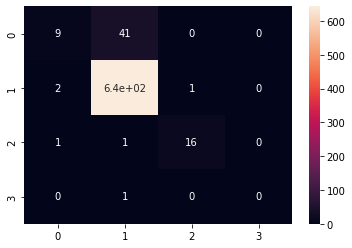

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
clf = tree.fit(X_train, y_train)
tree_predict = clf.predict(X_test)

In [ ]:
tree_ac = accuracy_score(y_test, tree_predict)
tree_ac

0.993006993006993

In [ ]:
tree_pr = precision_score(y_test, tree_predict, average = 'weighted', zero_division=0)
tree_pr

0.9917556128082443

In [ ]:
tree_rc = recall_score(y_test, tree_predict, average = 'weighted')
tree_rc

0.993006993006993

In [ ]:
from sklearn.metrics import f1_score
tree_f1 = f1_score(y_test, tree_predict, average = 'weighted')
tree_f1

0.9923643923643923

In [ ]:
metrics_tree = [tree_ac, tree_pr, tree_rc, tree_f1]

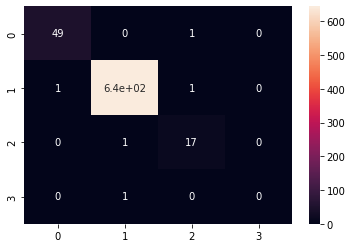

In [ ]:
cm_tree = confusion_matrix(y_test,tree_predict)
sns.heatmap(cm_tree,annot=True)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rclf = rf.fit(X_train, y_train)
rfpred = rclf.predict(X_test)

rf_ac = accuracy_score(y_test, rfpred)
rf_ac

0.993006993006993

In [ ]:
rf_pr = precision_score(y_test, rfpred, average = 'weighted', zero_division=0)
rf_pr

0.9920184485401877

In [ ]:
rf_rc = recall_score(y_test, rfpred, average = 'weighted')
rf_rc

0.993006993006993

In [ ]:
from sklearn.metrics import f1_score
rf_f1 = f1_score(y_test, rfpred, average = 'weighted')
rf_f1

0.9923909602621589

In [ ]:
metrics_rf = [rf_ac, rf_pr, rf_rc, rf_f1]

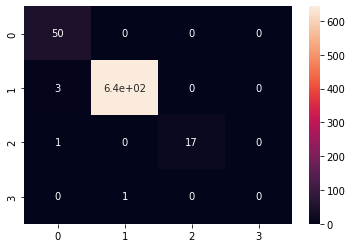

In [ ]:
cm_rf = confusion_matrix(y_test,rfpred)
sns.heatmap(cm_rf,annot=True)

Modelado Etapa 2
  - la clase predictora se convierte en una clase binaria
  - Se realiza Balanceo de los datos de la clase minoritaria utlizando oversampling con la funcion ADASYN

In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y test

from sklearn.model_selection import train_test_split

X_train1, X_test, y_train1, y_test = train_test_split(data_bin.drop('Class', axis=1), data_bin.Class, test_size=0.30, random_state = 1)
print (X_train1.shape, y_train1.shape)
print (X_test.shape, y_test.shape)

print(y_train1.sum())  #Cantidad de positivos antes del balanceo

#Balanceo de los datos de entrenamiento utilizando el metodo ADASYN (Adaptive Synthetic Sampling Approach for Imbalanced Learning.)
from imblearn.over_sampling import SMOTE, ADASYN
ada = ADASYN(random_state=42)
X_train, y_train = ada.fit_resample(X_train1, y_train1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
print(y_train.sum())  #Cantidad de positivos despues del balanceo


(1668, 25) (1668,)
(715, 25) (715,)
131
(3092, 25) (3092,)
(715, 25) (715,)
1555


In [ ]:
# Entrenamiento del modelo de clasificación por regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logisticRegr = LogisticRegression(solver="lbfgs", max_iter=500, tol=0.01)
logisticRegr.fit(X_train, y_train)


LogisticRegression(max_iter=500, tol=0.01)

In [ ]:
# Aplicación del modelo construido a los datos de test
predictions = logisticRegr.predict(X_test)
predictions

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
# Cálculo del accuracy para evaluar el desempeño del modelo sobre los datos de test
from sklearn.metrics import accuracy_score

logr_ac = accuracy_score(y_test, predictions)
logr_ac

0.9692307692307692

In [ ]:
from sklearn.metrics import precision_score

logr_pr = precision_score(y_test, predictions, average = 'weighted', zero_division=0)
logr_pr

0.9719314361301463

In [ ]:
from sklearn.metrics import recall_score

logr_rc = recall_score(y_test, predictions, average = 'micro')
logr_rc

0.9692307692307692

In [ ]:
from sklearn.metrics import f1_score
logr_f1 = f1_score(y_test, predictions, average = 'micro')
logr_f1

0.9692307692307692

In [ ]:
metrics_logr_b = [logr_ac, logr_pr, logr_rc, logr_f1]

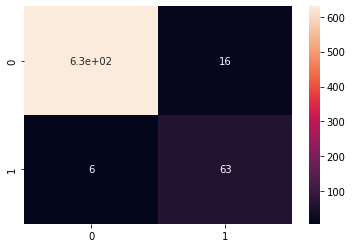

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True)

Arboles de Decision

In [ ]:
# Entrenamiento del modelo de clasificación por arboles de decision
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
clf = tree.fit(X_train, y_train)
tree_predict = clf.predict(X_test)


In [ ]:
# Calculo del Accuracy del Modelo Arboles de decision con los datos de pruebas
tree_ac = accuracy_score(y_test, tree_predict)
tree_ac

0.9958041958041958

In [ ]:
# Cálculo de la precision para evaluar el desempeño del modelo sobre los datos de test
tree_pr = precision_score(y_test, tree_predict, average = 'weighted', zero_division=0)
tree_pr

0.9958419874698945

In [ ]:
# Calculo del Recall para el modelo de arboles de decision
tree_rc = recall_score(y_test, tree_predict, average = 'weighted')
tree_rc

0.9958041958041958

In [ ]:
from sklearn.metrics import f1_score
tree_f1 = f1_score(y_test, tree_predict, average = 'weighted')
tree_f1

0.9958176636040542

In [ ]:
metrics_tree_b = [tree_ac, tree_pr, tree_rc, tree_f1]

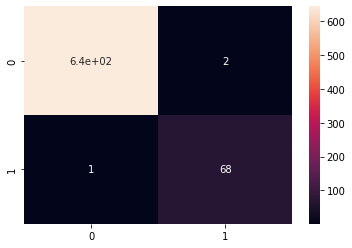

In [ ]:
cm_tree = confusion_matrix(y_test,tree_predict)
sns.heatmap(cm_tree,annot=True)

Random Forest

In [ ]:
# Entrenamiento del modelo de clasificación por random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rclf = rf.fit(X_train, y_train)
rfpred = rclf.predict(X_test)



In [ ]:
# Calculo del Accuracy del Modelo random forest con los datos de pruebas
rf_ac = accuracy_score(y_test, rfpred)
rf_ac

0.9944055944055944

In [ ]:
# Cálculo de la precision para evaluar el desempeño del modelo sobre los datos de test
rf_pr = precision_score(y_test, rfpred, average = 'weighted', zero_division=0)
rf_pr

0.9945194425904775

In [ ]:
# Calculo del Recall para el modelo de random forest
rf_rc = recall_score(y_test, rfpred, average = 'weighted')
rf_rc

0.9944055944055944

In [ ]:
from sklearn.metrics import f1_score
rf_f1 = f1_score(y_test, rfpred, average = 'weighted')
rf_f1

0.9944412176970318

In [ ]:
metrics_rf_b = [rf_ac, rf_pr, rf_rc, rf_f1]

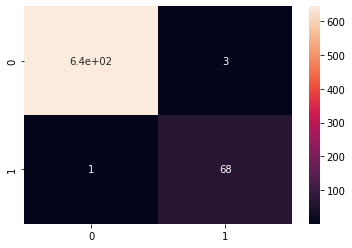

In [ ]:
cm_rf = confusion_matrix(y_test,rfpred)
sns.heatmap(cm_rf,annot=True)

In [ ]:
metrics_all = [metrics_logr, metrics_tree, metrics_rf,metrics_logr_b, metrics_tree_b, metrics_rf_b]
metrics_df = pd.DataFrame(metrics_all, columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score'])
metrics_df['model']= ['Logit', 'D-Tree', 'R. Forest','Logit Balanced OverSampled', 'D-Tree Balanced OverSampled', 'R. Forest Balanced OverSampled']
metrics_df.set_index('model', inplace = True)
metrics_df


,Accuracy,Precision,Recall,F1 Score
model,,,,
Logit,0.934266,0.923005,0.934266,0.934266
D-Tree,0.993007,0.991756,0.993007,0.992364
R. Forest,0.993007,0.992018,0.993007,0.992391
Logit Balanced OverSampled,0.969231,0.971931,0.969231,0.969231
D-Tree Balanced OverSampled,0.995804,0.995842,0.995804,0.995818
R. Forest Balanced OverSampled,0.994406,0.994519,0.994406,0.994441


# Fin del programa